! <center> 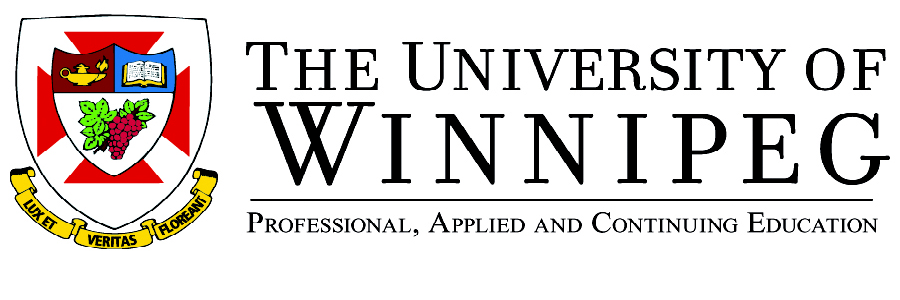

# <center> Assignment 6 - Data Streaming with Kafka
## <center> by
## <center> Ayotunde Oyewole

## Executive Summary
This project covered basic aspects of data streaming processes. The technical stack involved include Python, postgresql, linux terminal and Apache Kafka. A producer python script was used to generate random weather data within specified ranges. This data simulates data collected from weather sensors in the specified locations (Winnipeg and Vancouver). The weather fields included temperature, wind speed and humidity. This data was encoded as json data and transmitted into a kafka topic.

Another python script - consumer.py was used to retrieve the data, decode the json data format and then load a postgres database. For ease of code regeneration, the Kafka topic, database, and the database tables were all created using python scripts. This also made it possible to explore the creation of a kafka topic using python, since creation through terminal had been explored in class. All activities in the producer and consumer scripts were logged in corresponding log files.

Erroneously installed kafka instead of kafka-python. Then correctly installed kafta.

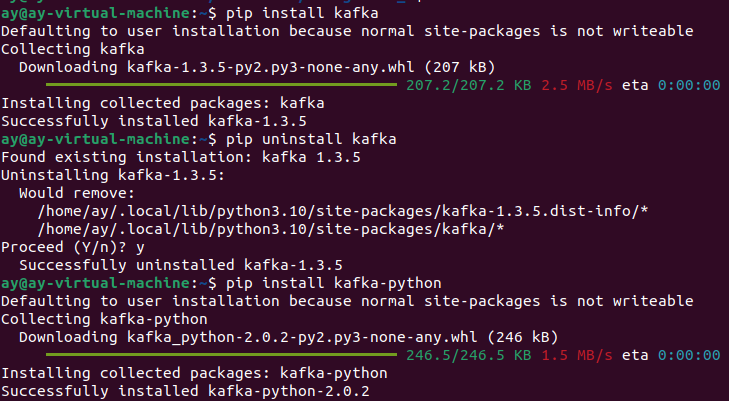

## 1.0 Producer Script
### 1.1 Topic Creation  
After defining log configurations, a Kafka admin_client was created to help create a new kafka topic called weather_app. Exception handling was used to capture and handle likely error of "topic already exists" if the code is executed multiple times. This method of topic definition was preferred so that I can explore topic creation from python script. Topic creation from terminal had previously been explored in a class exercise. This method was also convenient as it meant that all code was contained in this script. If the topic were to be deleted for example, I can still run this script without errors.
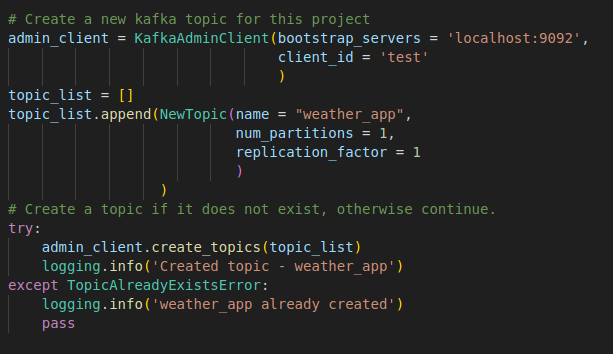
### 1.2 Generator Function
A function was defined which simply uses the randint function to generate random weather data within given ranges. randint was preffered for this tax because in reality, weather data is reported as integers, not as float. This project was developed to mimic real world scenarios as closely as possible. The function generates data for Winnipeg and then for Vancouver. It returns a json data object containing the weather data. The json object is utf-8 encoded.
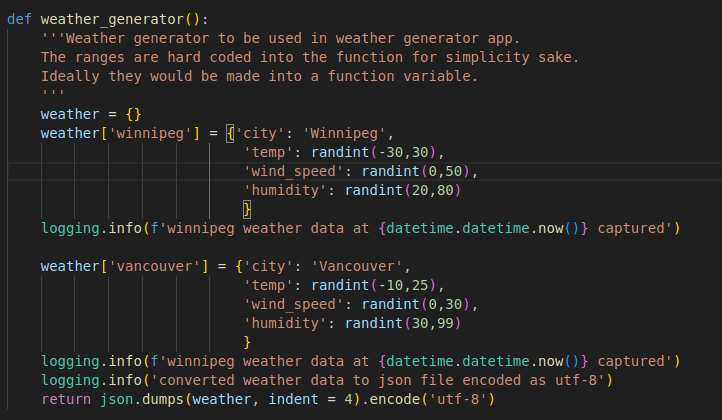
### 1.3 Data Transmission
The kafka producer was then instantiated and used to .send the weather data to the weather_app topic. This was accomplished by using a while loop to call the weather_generator function. It was set to a sleep time of 5 seconds, so that it generates and transmits new data every 5 seconds. Since an infinite loop was used, an exception handling rule was set to capture the keyboard interrupt error from manually terminating the process. It simply logs the number of successful records transmitted before interruption, and then breaks without crashing.
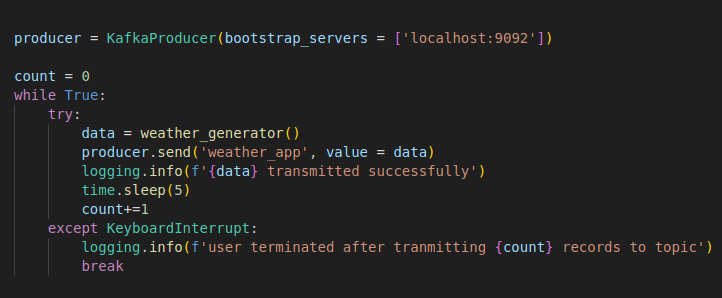


### 1.4 Sample Json Tranmitted
To test the successfuly transmission of the data, a consumer instance was set in the terminal to listen to the json data produced. Below is a screenshot of what some of the data looked like.
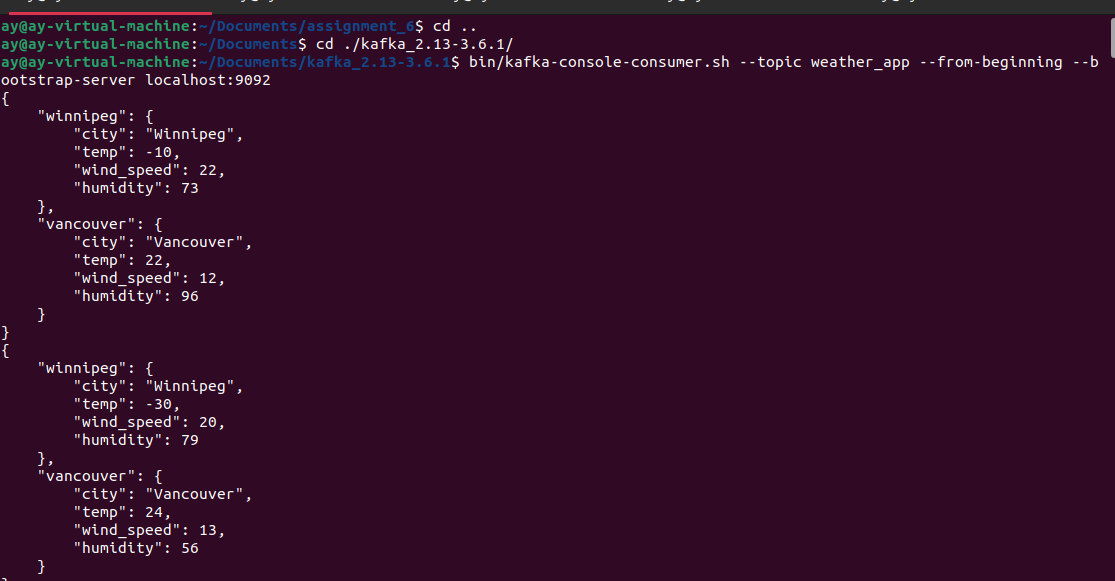

## 2.0 Consumer Script
Having successfully executed and tested the producer script, the consumer script was written to fetch every instance of the streaming data from the topic to a postgres database in realtime.

### 2.1 Database Creation and Connection
Again, after necessary logging definitions, a connection was instantiated to the postgres server. A database was created therein, and then a connection was set to that database. For convenience, autocommit was set to True. 

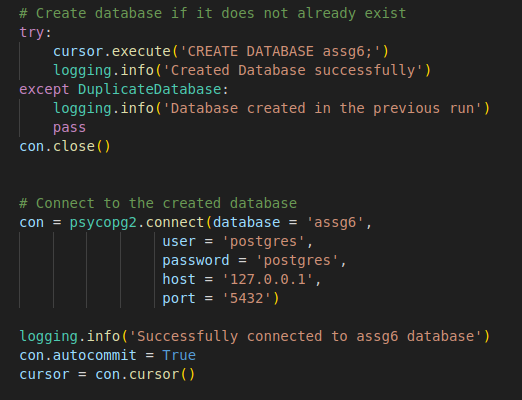

### 2.2 Table Creation
Two tables were created for this project. While the project requirement seemed to be for one table containing the weather information for both cities, I preferred to use two tables because that appeared more practical. In real world situations, seperate tables would contain weather information for seperate cities. With a mindset of real world applicability, the table for winnipeg weather data was created seperately from the table for vancouver weather data. Furthermore, streaming into two different tables provided an opportunity to test this capability in kafka. 
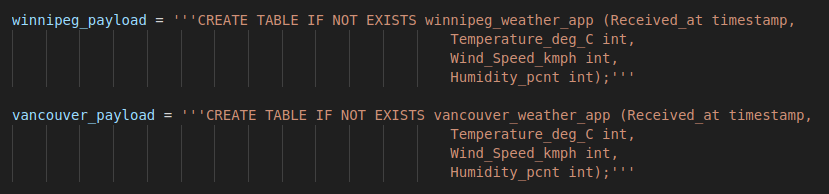

### 2.3 Table Loader Function
A function was created to load the tables. It takes the table name and the json data as variables. The function seperates the json data into its constituent variables and then sets those as values to be inserted into the named table. This function does not return anything but simply executes an sql payload.
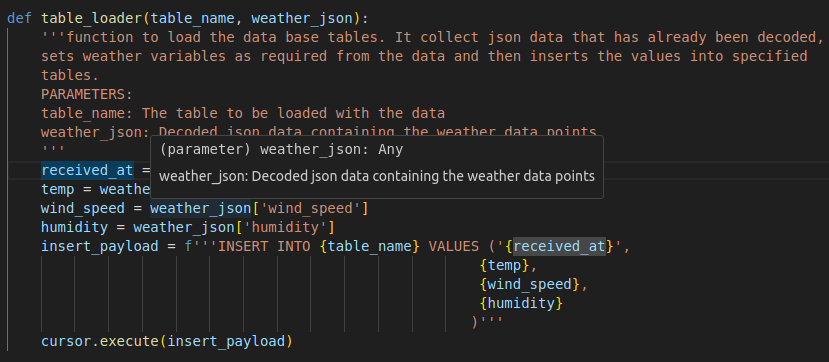

### 2.4 Data Loading
The actual data loading is accomplished using the trio of a while loop, a for loop, and a try-except exception handling. After the kafka consumer is intantiated, a for loop extract the value and the timestamp from the contents of this consumer. The timestamp from the consumer is used because it represents the true time the data was received into the topic. Using datetime.now() will return another timeframe entirely (time when the data was loaded to the database). The timestamp referenced in the assignment instructions seemed to relate more with the time the data was received by the consumer. TThe formatting of this timestamp to datetime string had been previously setup in the table loader funciton. The message is decoded and the data for the respective cities is extracted and saved to their variables. The table loader function is called for each city and then a keyboard interrupt exception handler is put in place to prevent crashing when the while loop is manually terminated. The count of successful records loaded to database is logged.
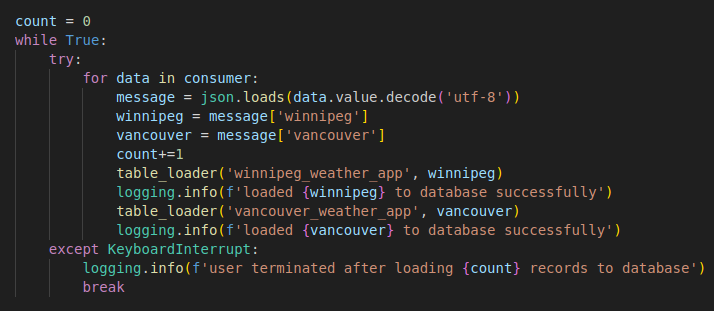

## 3.0 Script Execution from Terminal
To complete the project, the script is executed from terminal. First the zookeeper and the kafka broker services were started. While these were running, a new terminal was used to run the producer script. Finally the consumer script was executed in yet another terminal. The log folder and the corresponding files were thus created. The database and the required tables were also created. The producer and consumer scripts were allowed to run for about ten minutes before terminating. This resulted in the loading of 134 records in each of Winnipeg_weather_app and vancouver_weather_app tables. The following screenshots shows these steps in succession. A screenshot of some of the table contents is also presented below.
### 3.1 Starting the Zookeeper Service
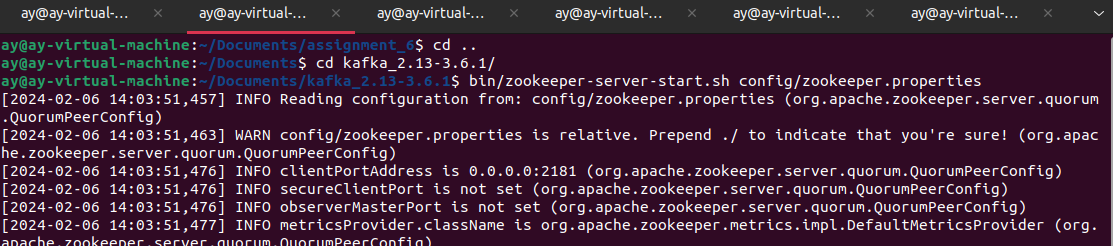

### 3.2 Starting the Kafka service
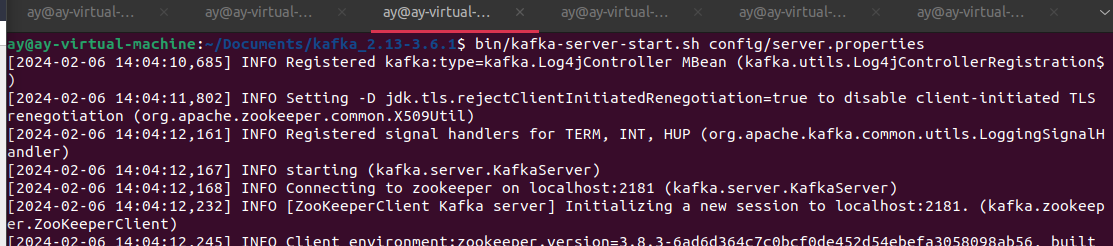

### 3.3 Running the Producer.py
The weather_app topic was first deleted. This is because it contained all the data that had been used to test the scripts. This was not a problem since the script itself is configured to re-create the topic if it doesnt exist.
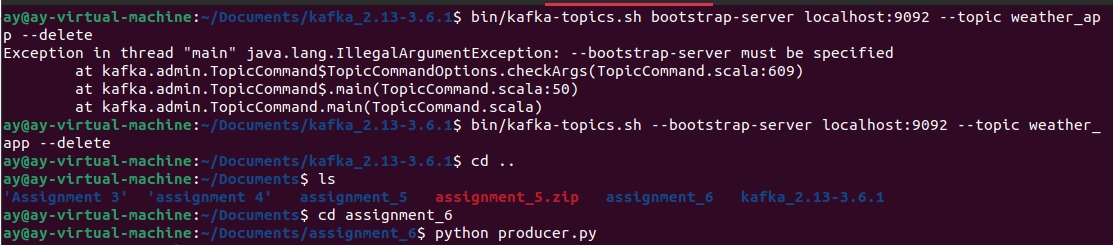

### 3.4 Running the Consumer.py



### 3.4 Log Folder Created

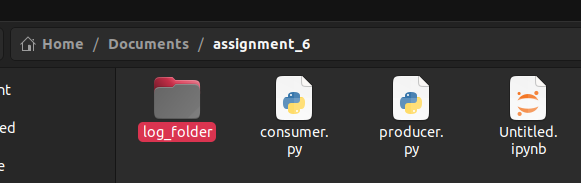
### 3.5 Log Files Created

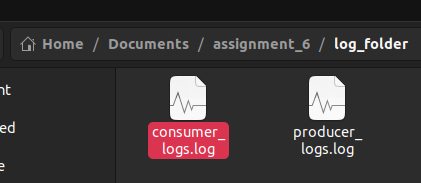

### 3.6 Winnipeg Database Table
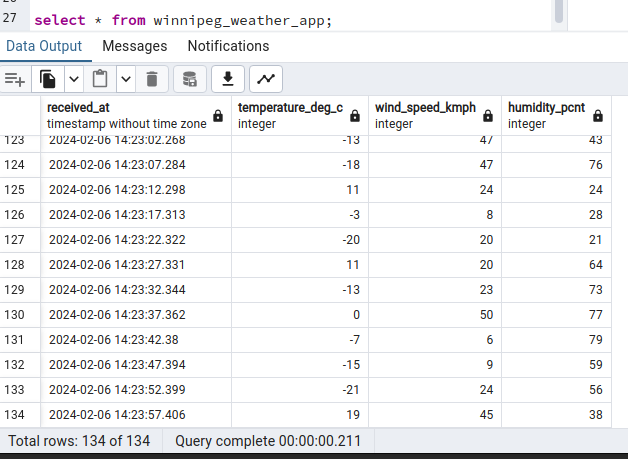
### 3.7 Vancouver Database Table
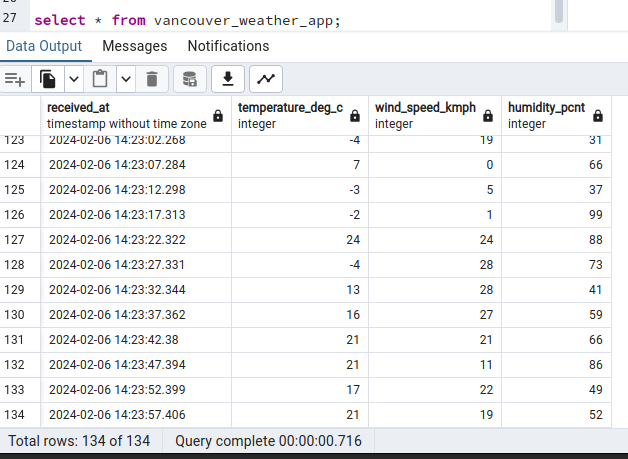

### 3.8 Sample Producer Logs
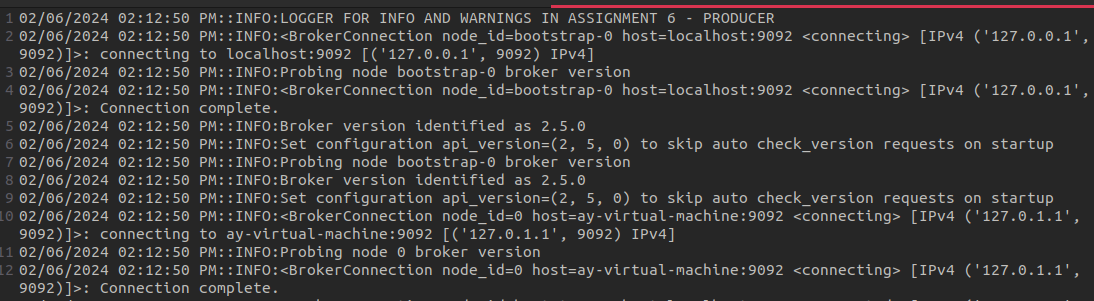

### 3.9 Sample Consumer Logs
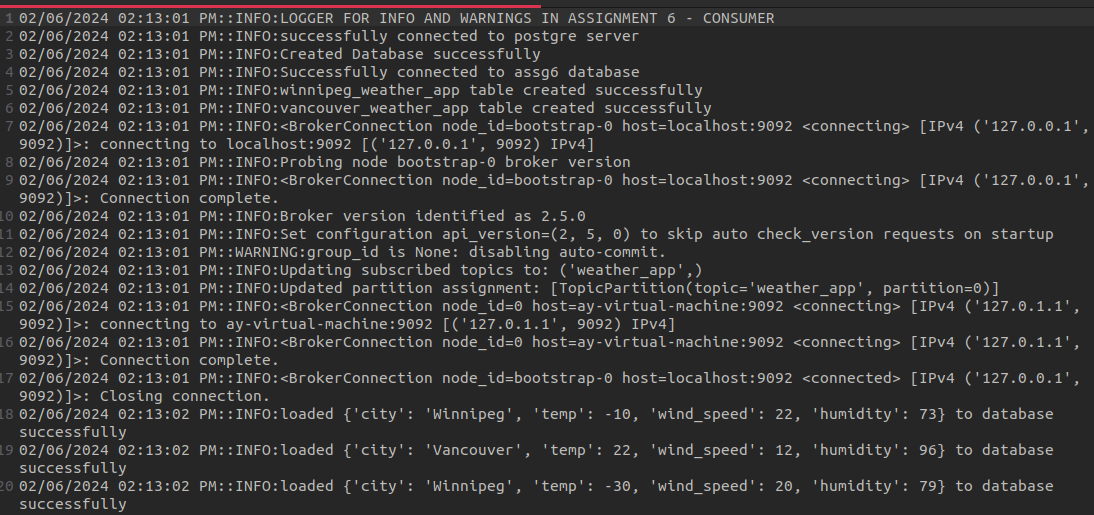

## 4.0 Conclusion
The procedure was streaming data from the source to a destination was demonstrated in this project using kafka. Two different tables were loaded with the data streams in real time by setting up a consumer script. The data generate from a producer script was transmitted to a kafka topic from where the consumer script picks it. At the end of the project, 134 records were loaded into each table. The script and logs for this project are submitted along with this report in a zipped folder.